<a href="https://colab.research.google.com/github/nihadse/nihad_hello/blob/main/big_MAMAS_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import matplotlib.patches as mpatches
from sklearn.compose import ColumnTransformer
from sklearn.semi_supervised import LabelSpreading
from scipy import stats
import torch
from matplotlib import cm
import seaborn as sns
import plotly.express as px
import torch.nn as nn
from torch_geometric.data import Data
from torch.optim import Adam
import torch.optim as optim
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.utils import from_networkx
import networkx as nx
import optuna
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, FunctionTransformer, PowerTransformer


In [7]:
pip install optuna
pip install torch_geometric
pip install networkx
pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 11.1 MB/s eta 0:00:00


In [9]:
mal_ips = pd.read_csv("/content/drive/MyDrive/malicious_ips.csv")
auto_sys = pd.read_csv("/content/drive/MyDrive/autonomous_systems.csv")
watchers = pd.read_csv("/content/drive/MyDrive/watchers.csv")

In [10]:
mal_ips.head(3)

,id,unique_watcher_reported,attack_type,is_validated,as_num
0,3,{21},Exploit,NaN,16509.0
1,4,{25},Exploit,NaN,16509.0
2,9,"{20354, 3587, 83714, 34181, 33423, 52497, 786,...",Bruteforce,True,206728.0


In [11]:
mal_ips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29187 entries, 0 to 29186
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       29187 non-null  int64  
 1   unique_watcher_reported  29187 non-null  object 
 2   attack_type              29187 non-null  object 
 3   is_validated             3196 non-null   object 
 4   as_num                   29186 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.1+ MB


In [12]:
auto_sys.head(3)

,as_num,n_ips_reported,as_name
0,3320,55294,Deutsche Telekom AG
1,4134,39891,Chinanet
2,16509,30914,AMAZON-02


In [13]:
auto_sys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15161 entries, 0 to 15160
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   as_num          15161 non-null  int64 
 1   n_ips_reported  15161 non-null  int64 
 2   as_name         15160 non-null  object
dtypes: int64(2), object(1)
memory usage: 355.5+ KB


In [14]:
watchers.head(3)

,id,age_in_days,activity_in_days,hp_overlap_rate,n_ips_reported
0,42266,116,116,0.04,3636
1,11213,211,157,0.31,1555
2,87345,30,28,0.09,70


In [15]:
watchers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2121 non-null   int64  
 1   age_in_days       2121 non-null   int64  
 2   activity_in_days  2121 non-null   int64  
 3   hp_overlap_rate   2121 non-null   float64
 4   n_ips_reported    2121 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 83.0 KB


In [16]:
df = mal_ips.join(auto_sys.set_index('as_num'),on='as_num')
df.head()

,id,unique_watcher_reported,attack_type,is_validated,as_num,n_ips_reported,as_name
0,3,{21},Exploit,NaN,16509.0,30914.0,AMAZON-02
1,4,{25},Exploit,NaN,16509.0,30914.0,AMAZON-02
2,9,"{20354, 3587, 83714, 34181, 33423, 52497, 786,...",Bruteforce,True,206728.0,14.0,Media Land LLC
3,78,{20},Bruteforce,True,9299.0,769.0,Philippine Long Distance Telephone Company
4,92,{28},Exploit,NaN,16509.0,30914.0,AMAZON-02


In [17]:
df.set_index('id', inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29187 entries, 3 to 1351169
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   unique_watcher_reported  29187 non-null  object 
 1   attack_type              29187 non-null  object 
 2   is_validated             3196 non-null   object 
 3   as_num                   29186 non-null  float64
 4   n_ips_reported           29173 non-null  float64
 5   as_name                  29173 non-null  object 
dtypes: float64(2), object(4)
memory usage: 1.6+ MB


In [19]:
df = df.dropna(subset=["as_name"])

In [20]:
fig = px.histogram(df, x="attack_type", color="attack_type", title="Distrubution of Attack type")
fig.show()

In [21]:
pd.DataFrame(df.as_name.value_counts().nlargest(10))

,as_name
Deutsche Telekom AG,4162
Vodafone GmbH,1815
Kyivstar PJSC,1009
Chinanet,958
CLOUDFLARENET,950
Hetzner Online GmbH,760
Alpha Strike Labs GmbH,712
DIGITALOCEAN-ASN,604
Telefonica Germany,601
MICROSOFT-CORP-MSN-AS-BLOCK,491


In [22]:
df["nbr_watchers"]=df["unique_watcher_reported"].str.count(",")+1

In [23]:
df.head()

,unique_watcher_reported,attack_type,is_validated,as_num,n_ips_reported,as_name,nbr_watchers
id,,,,,,,
3,{21},Exploit,NaN,16509.0,30914.0,AMAZON-02,1
4,{25},Exploit,NaN,16509.0,30914.0,AMAZON-02,1
9,"{20354, 3587, 83714, 34181, 33423, 52497, 786,...",Bruteforce,True,206728.0,14.0,Media Land LLC,43
78,{20},Bruteforce,True,9299.0,769.0,Philippine Long Distance Telephone Company,1
92,{28},Exploit,NaN,16509.0,30914.0,AMAZON-02,1


In [24]:
df.loc[df["nbr_watchers"].nlargest(10).index.values][["as_name", 'nbr_watchers']]

,as_name,nbr_watchers
id,,
2145,CLOUDFLARENET,251
336134,CLOUDFLARENET,251
700748,China Mobile communications corporation,178
674918,Chinanet,176
850077,Chinanet,176
229621,China Mobile communications corporation,172
229668,China Mobile communications corporation,172
847104,China Mobile communications corporation,171
203064,Chinanet,169


In [25]:
pd.DataFrame(df.groupby("as_name").sum()["nbr_watchers"].nlargest(10))

<ipython-input-25-6f793965dda1>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,nbr_watchers
as_name,
Deutsche Telekom AG,4201
Hetzner Online GmbH,3216
Chinanet,2546
Vodafone GmbH,1978
China Mobile communications corporation,1658
DIGITALOCEAN-ASN,1638
OVH SAS,1544
CLOUDFLARENET,1493
GOOGLE,1176


## The 10 watchers who suffered from the highest number of attacks

In [26]:
pd.DataFrame(watchers.groupby('id').sum()["n_ips_reported"].nlargest(10))

,n_ips_reported
id,
47,121623
92263,105883
9662,87083
9663,83057
9563,80696
7286,58962
77642,58070
24249,39127
715,21605


##### The distribution of the average `activity_in_days` and `age_in_days` of the watchers who reported each malicious IPs. with respect to the `is_validated` variable.

First we need to create these new features

In [27]:
df.unique_watcher_reported = df.unique_watcher_reported.apply(lambda x :pd.eval(x.replace("{","[").replace("}","]")))

In [28]:
watchers.set_index("id", inplace=True)

In [29]:
df["avg_activity_in_days"] = df.unique_watcher_reported.apply(lambda x: watchers.loc[x].activity_in_days.mean())
df["avg_age_in_days"] = df.unique_watcher_reported.apply(lambda x: watchers.loc[x].age_in_days.mean())

In [30]:
fig = px.box(df, x=df.is_validated, y=df.avg_age_in_days, color=df.is_validated,
             title="Distribution of the average age_in_days compared to the validation")
fig.show()

In [ ]:
fig = px.box(df, x=df.is_validated, y=df.avg_activity_in_days, color=df.is_validated,
             title="Distribution of the average activity_in_days compared to the validation")
fig.show()

We can see a lot of outliers in both Boxplots

#### Feature Engineering

Let's look at the distrubution of n_ips_reported for each Autonoums system in the AS file

In [31]:
fig = px.histogram(df, x="n_ips_reported")
fig.show()

In [32]:
df.n_ips_reported.isna().value_counts()

False    29173
Name: n_ips_reported, dtype: int64

The distrubution seems to be *tail-heavy*: It extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns. We will try transforming these attributes later on to have more bell-shaped distributions.

There are various types of Mathematical Transformers, usually divided into two categories:

- Linear Transformers   MinMax Transformer , Normalization
- Function Transformers Log Transform , Reciprocal Transform , Square Transform    
- Power Transformers Box-Cox ,Yeo-Johnson

Now let's compare them to see which one we should use

## Linear transformers

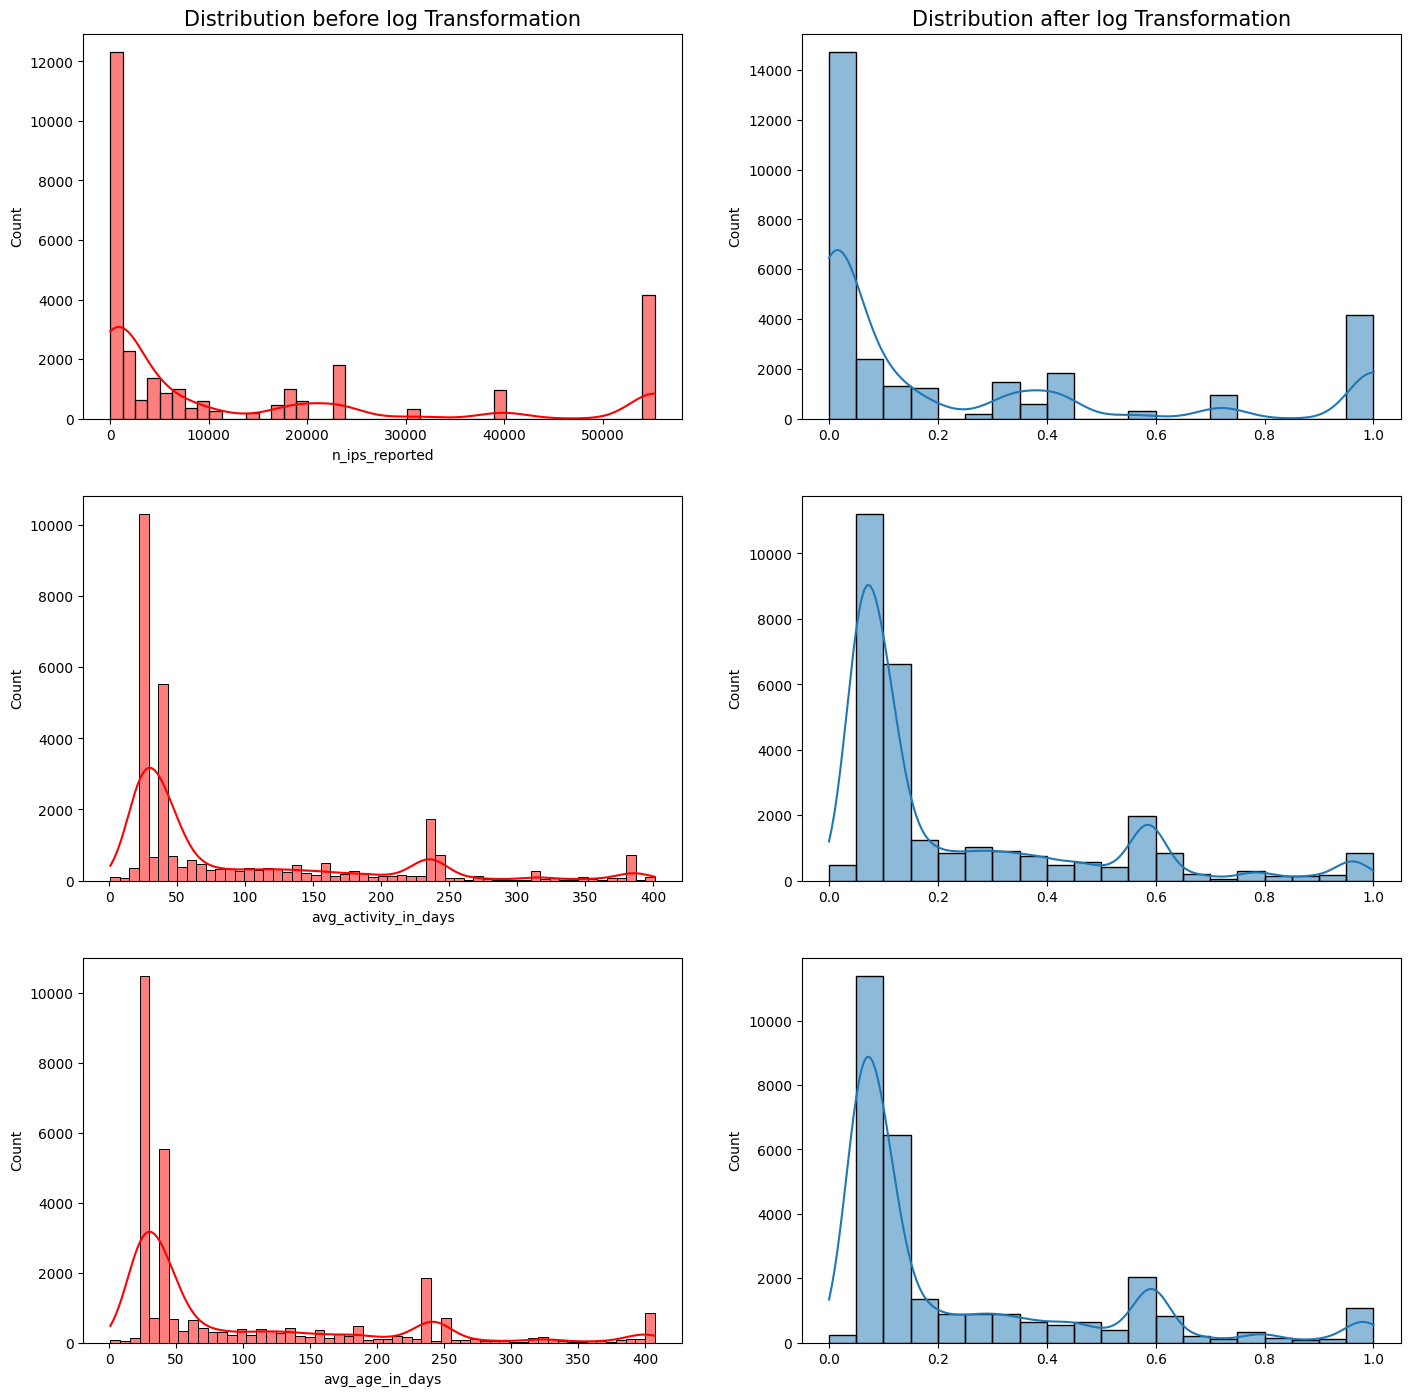

In [33]:
def linear_tran(features):   # function to apply transformer and check the distribution with histogram and kdeplot
    nbr_ft=len(features)
    fig, axs = plt.subplots(nbr_ft,2, figsize=(17,17))

    rg=list(range(nbr_ft))
    for i, f in zip(rg,features):
        minmaxscaler = MinMaxScaler(feature_range=(0, 1))
        axs[0,0].set_title("Distribution before log Transformation", fontsize=15)
        sns.histplot(df[f], kde=True, color="red", ax=axs[i,0])
        df_minmaxscaler = pd.DataFrame(minmaxscaler.fit_transform(df[f].values.reshape(-1,1)))
        axs[0,1].set_title("Distribution after log Transformation", fontsize=15)
        sns.histplot(df_minmaxscaler,bins=20, kde=True , legend=False, ax=axs[i,1])


    plt.show()


linear_tran(features=["n_ips_reported", "avg_activity_in_days", "avg_age_in_days"])

### Function transformers

####  Log transformer

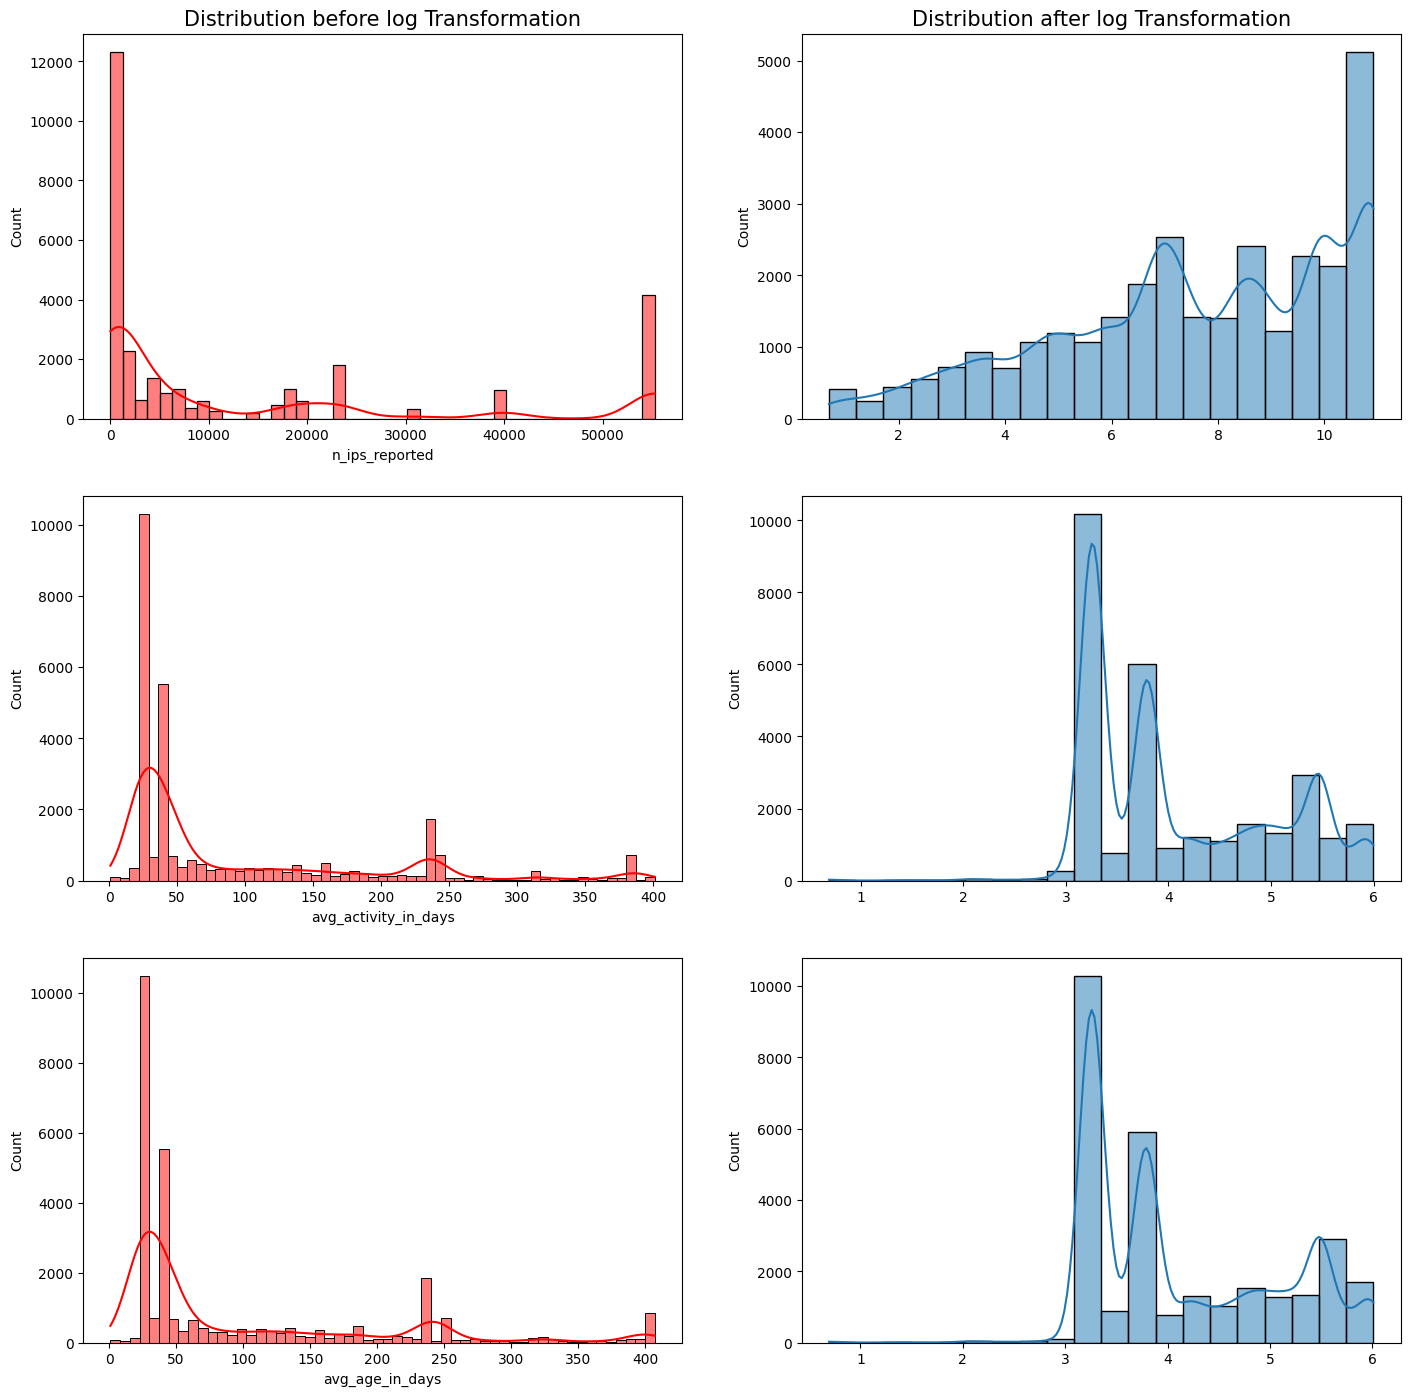

In [34]:
def logTrans(features):   # function to apply transformer and check the distribution with histogram and kdeplot
    nbr_ft=len(features)
    fig, axs = plt.subplots(nbr_ft,2, figsize=(17,17))

    rg=list(range(nbr_ft))
    for i, f in zip(rg,features):

        logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.log1p), [f])])
        axs[0,0].set_title("Distribution before log Transformation", fontsize=15)
        sns.histplot(df[f], kde=True, color="red", ax=axs[i,0])
        df_log = pd.DataFrame(logTr.fit_transform(df))
        axs[0,1].set_title("Distribution after log Transformation", fontsize=15)
        sns.histplot(df_log,bins=20, kde=True , legend=False, ax=axs[i,1])


    plt.show()



logTrans(features=["n_ips_reported", "avg_activity_in_days", "avg_age_in_days"])

### Power transformers

#### Yeo-Johnson Transformation:

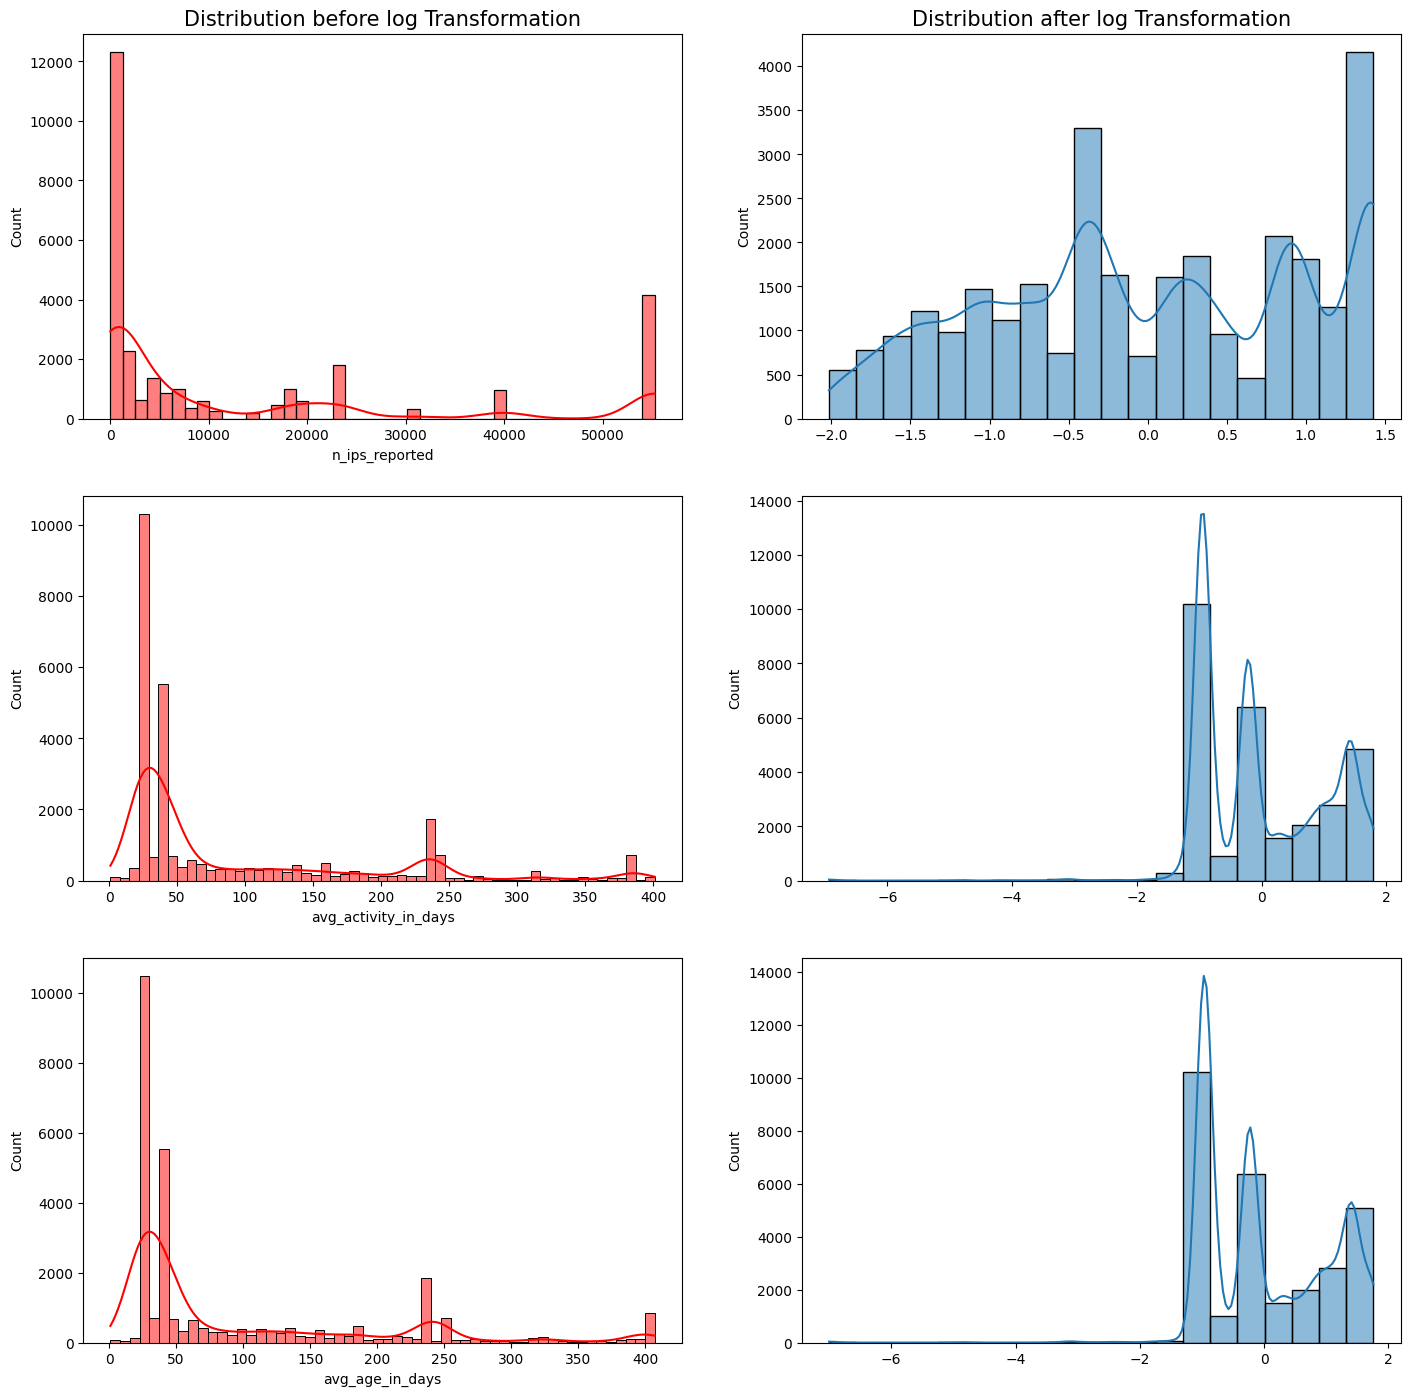

In [35]:
def yeojohntrans(features):   # function to apply transformer and check the distribution with histogram and kdeplot
    nbr_ft=len(features)
    fig, axs = plt.subplots(nbr_ft,2, figsize=(17,17))

    rg=list(range(nbr_ft))
    for i, f in zip(rg,features):

        yeojohnTr = PowerTransformer(standardize=True)   # not using method attribute as yeo-johnson is the default

        axs[0,0].set_title("Distribution before log Transformation", fontsize=15)
        sns.histplot(df[f], kde=True, color="red", ax=axs[i,0])

        df_yeojohn = pd.DataFrame(yeojohnTr.fit_transform(df[f].values.reshape(-1,1)))
        axs[0,1].set_title("Distribution after log Transformation", fontsize=15)
        sns.histplot(df_yeojohn,bins=20, kde=True , legend=False, ax=axs[i,1])


    plt.show()


yeojohntrans(features=["n_ips_reported", "avg_activity_in_days", "avg_age_in_days"])


- for n_ips_reported we'll use Yeo-Johnson
- for avg_activity_in_days & avg_age_in_days we'll use Min-Max scalling

In [36]:
yeojohnTr = PowerTransformer(standardize=True)
df['n_ips_reported_tran']=yeojohnTr.fit_transform(df.n_ips_reported.values.reshape(-1,1))

In [37]:
minmaxscaler = MinMaxScaler(feature_range=(0, 1))
df['avg_age_in_days_tran']=minmaxscaler.fit_transform(df.avg_age_in_days.values.reshape(-1,1))
df['avg_activity_in_days_tran']=minmaxscaler.fit_transform(df.avg_activity_in_days.values.reshape(-1,1))

## Connected Graph

Graph $G = (V,E)$ where a node $v$ is a malicious IP and an edge $e$ links two malicious IPs if they were reported by the same watcher. Hence the edges are weighted by the number of times 2 malicious IPs were reported by the same watchers.

For now we will work on only the **validated ips**

In [38]:
df_is_val=df.dropna(subset=['is_validated'])

In [39]:
le = LabelEncoder()
df_is_val['attack_type']=le.fit_transform(df_is_val['attack_type'])

<ipython-input-39-102633a0557d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Extracting features**

In [40]:
features = df_is_val[["n_ips_reported_tran", "nbr_watchers","avg_activity_in_days_tran","avg_age_in_days_tran"]].to_dict(orient="index")

In [41]:
classes = df_is_val[["attack_type"]].to_dict(orient="index")
classes

{9: {'attack_type': 0},
 78: {'attack_type': 0},
 114: {'attack_type': 0},
 190: {'attack_type': 0},
 408: {'attack_type': 4},
 508: {'attack_type': 2},
 617: {'attack_type': 5},
 980: {'attack_type': 4},
 1146: {'attack_type': 0},
 1219: {'attack_type': 5},
 1230: {'attack_type': 0},
 1372: {'attack_type': 5},
 1437: {'attack_type': 3},
 1883: {'attack_type': 0},
 2374: {'attack_type': 0},
 2449: {'attack_type': 0},
 2533: {'attack_type': 4},
 2536: {'attack_type': 0},
 2567: {'attack_type': 4},
 2853: {'attack_type': 4},
 2859: {'attack_type': 4},
 2903: {'attack_type': 4},
 2913: {'attack_type': 4},
 3064: {'attack_type': 4},
 3169: {'attack_type': 4},
 3177: {'attack_type': 4},
 3218: {'attack_type': 4},
 3257: {'attack_type': 4},
 3364: {'attack_type': 4},
 3472: {'attack_type': 3},
 3482: {'attack_type': 4},
 3758: {'attack_type': 4},
 3777: {'attack_type': 4},
 3936: {'attack_type': 4},
 3949: {'attack_type': 4},
 3999: {'attack_type': 4},
 4185: {'attack_type': 4},
 4283: {'att

In [42]:
for key, value in features.items():
    features[key] = list(value.values())

In [43]:
for key, value in classes.items():
    classes[key] = list(value.values())

Initiating the nodes

In [44]:
nodes_id = df_is_val.index.to_list()
nodes = [(node,{'x':features[node],'y':classes[node]}) for node in nodes_id]

In [45]:
watchers_list = df_is_val.unique_watcher_reported.to_list()
edges = []
for i in range(len(nodes_id)):
    for j in range(i+1,len(nodes_id)):
        weight = len(set(watchers_list[i])&set(watchers_list[j]))
        if weight!=0 :
            edges.append((nodes_id[i], nodes_id[j], weight))

#### Function to construct graph

In [46]:
def construct_graph(nodes, edges):
    graph = nx.Graph()
    graph.add_nodes_from(nodes)
    graph.add_weighted_edges_from(edges)
    return (graph)

In [47]:
graph=construct_graph(nodes, edges)
graph.number_of_nodes(), graph.number_of_edges()

(3187, 489474)

The Graph has **3187** nodes and **489474** edges

##  Visualization:

In [48]:
sample_df= df_is_val.loc[df_is_val.nbr_watchers.nlargest(40).index]

In [49]:
features = sample_df[["n_ips_reported_tran",
               "nbr_watchers",
               "avg_activity_in_days_tran",
               "avg_age_in_days_tran"]].to_dict(orient="index")

In [50]:
classes = sample_df[["attack_type"]].to_dict(orient="index")

In [51]:
for key, value in features.items():
    features[key] = list(value.values())

In [52]:
for key, value in classes.items():
    classes[key] = list(value.values())

In [53]:
nodes_id = sample_df.index.to_list()
nodes = [(node,{'x':features[node],'y':classes[node]}) for node in nodes_id]

In [61]:
#Define the undirected weighted edges
watchers_list = sample_df.unique_watcher_reported.to_list()
edges = []
for i in range(len(nodes_id)):
    for j in range(i+1,len(nodes_id)):
        weight = len(set(watchers_list[i])&set(watchers_list[j]))
        if weight!=0 :
            edges.append((nodes_id[i], nodes_id[j], weight))

**Constructing the graph**

In [62]:
sample_graph=construct_graph(nodes, edges)

In [63]:
sample_graph.number_of_nodes(), sample_graph.number_of_edges()

(40, 729)

In [64]:
node_colors=sample_df.attack_type.values

**Function to draw the graph**

In [65]:
def draw_graph2(data_nx):

    targets_color = []
    for i in list(data_nx.nodes):
        targets_color.append(sample_df['attack_type'][i])

    node_colors = torch.tensor(targets_color)
    pos= nx.spring_layout(data_nx,scale =1)
    plt.figure(figsize=(13,9))

    rgba_values=[]
    my_patches=[]
    for i in node_colors.unique():

        norm = matplotlib.colors.Normalize(vmin=0, vmax=6)
        my_map=plt.get_cmap('Set1')

        my_color=my_map(norm(i))

        my_patches.append(mpatches.Patch(color=my_color, label= "{}".format(le.classes_[i])))


    plt.legend(handles=my_patches, loc="upper left")

    nx.draw(data_nx, pos,  cmap=plt.get_cmap('Set1'), vmin=0, vmax=6,
            node_color =node_colors, node_size=400,connectionstyle="arc3,rad=0.2",
            width =0.5, with_labels = False, edge_color = 'k', arrowstyle = "-")

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:304: UserWarning:



The arrowstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for arrowstyle.
Note that using FancyArrowPatches may be slow for large graphs.




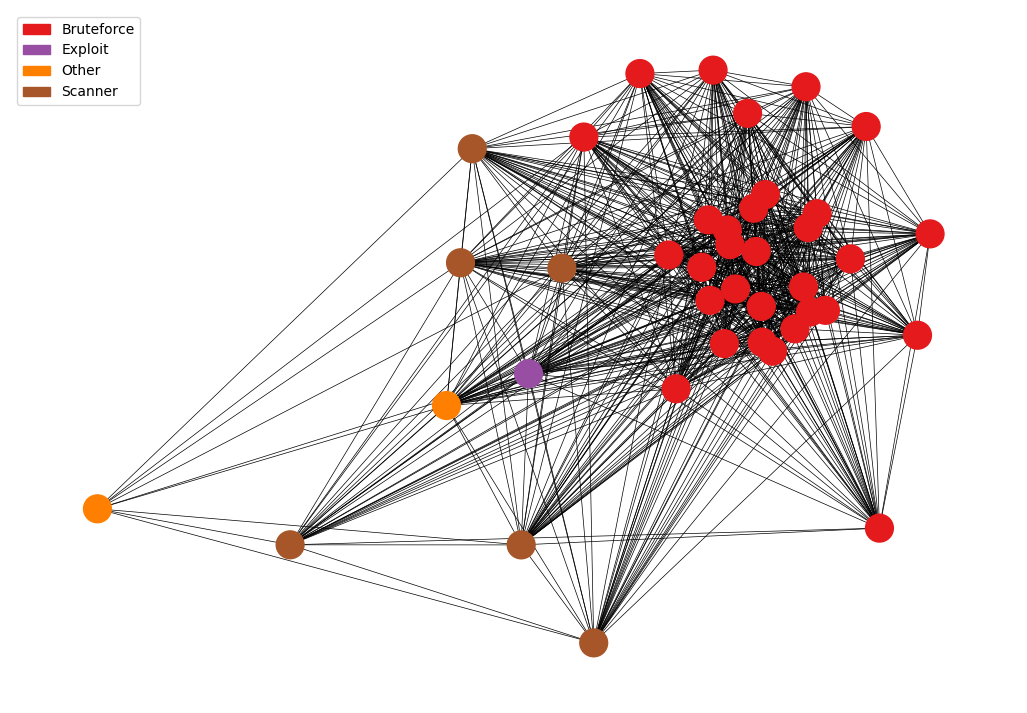

In [66]:
draw_graph2(sample_graph)

We can see the **high** number of connections in the middle of the graph region, attributed to the **red nodes** that represent the "Bruteforce attack", which is the most frequent in our sample

### Plot a heatmap of the adjacency matrix of the top 40 most connected nodes



In [67]:
sample_adj = nx.adjacency_matrix(sample_graph)

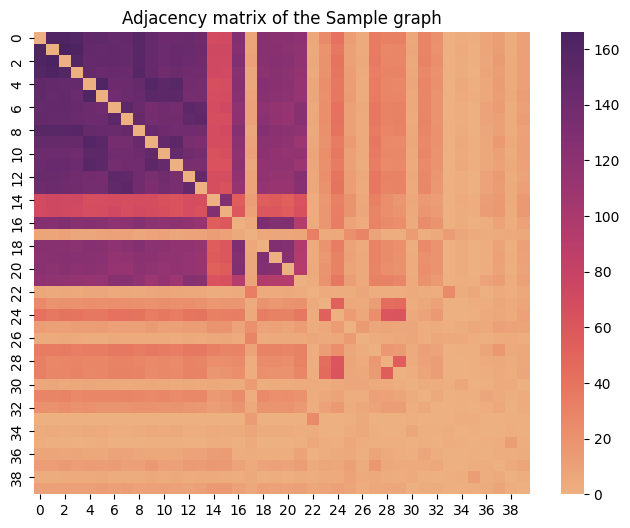

In [68]:
plt.figure(figsize=(8,6))
sns.heatmap(sample_adj.todense(), cmap="flare")
plt.title("Adjacency matrix of the Sample graph")
plt.show()

## Training a node classifier

In [69]:
data = gdf = from_networkx(graph)

In [70]:
#train test split
train_ratio = 0.8
val_ratio = 0.1

In [71]:
n_nodes = data.x.shape[0]
num_train = int(n_nodes * train_ratio)
num_val = int(n_nodes * val_ratio)

Creating the masks for our train, test and val data

In [72]:
index = [i for i in range(n_nodes)]
np.random.shuffle(index)
train_mask = torch.full_like(data.y, False, dtype=bool)
train_mask[index[:num_train]] = True
train_mask=torch.squeeze(train_mask) # added

In [73]:
test_mask = torch.full_like(data.y, False, dtype=bool)
test_mask[index[num_train:num_train+num_val]] = True
test_mask = torch.squeeze(test_mask) ## added

In [74]:
val_mask = torch.full_like(data.y, False, dtype=bool)
val_mask[index[num_train+num_val:]] = True
val_mask = torch.squeeze(val_mask)

Adding the masks to the graph

In [75]:
data.train_mask = train_mask
data.test_mask = test_mask
data.val_mask = val_mask

data.y=torch.squeeze(data.y)

## Training the model

The model utilized 2 GCNConv layers. The first GCNConv layer will be followed by a non-linearity ReLU activation function and a Dropout function.

The result of the first GCNConv layer will be fed to the second GCNConv layer. A Softmax function is finally applied to get  the distribution over the number of classes.

In [76]:
units=24
class GCN(torch.nn.Module):
    def __init__(self, units):
        super().__init__()
        self.conv1 = GCNConv(4, units) #4 =the number of feautures
        self.conv2 = GCNConv(units, 6) #6 =the number of classes

    def forward(self, data):
        # x: Node feature matrix
        # edge_index: Graph connectivity matrix
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)

        return F.log_softmax(x, dim=1)

we will also use a learning_rate of 0.01

In [77]:
model = GCN(24) #
# adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [78]:
#Function for computing accuracy
def compute_accuracy(pred_y, y):
    return (pred_y == y).sum()

In [79]:
# train the model 100 `epochs`
model.train()
losses = []
accuracies = []
losses_val = []
accuracies_val = []
for epoch in range(100):
    optimizer.zero_grad()
    out = model(data)

    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss_val = F.nll_loss(out[data.val_mask], data.y[data.val_mask])

    correct = compute_accuracy(out.argmax(dim=1)[data.train_mask], data.y[data.train_mask])
    acc = int(correct) / int(data.train_mask.sum())

    correct_val = compute_accuracy(out.argmax(dim=1)[data.val_mask], data.y[data.val_mask])
    acc_val = int(correct_val) / int(data.val_mask.sum())

    losses.append(loss.item())
    losses_val.append(loss_val.item())

    accuracies.append(acc)
    accuracies_val.append(acc_val)

    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print('Epoch: {}, Training Loss: {:.4f}, Training Acc: {:.4f},  Validation Loss: {:.4f}, Validation Acc: {:.4f}'.format(epoch+1, loss.item(), acc, loss_val.item(), acc_val))

Epoch: 10, Training Loss: 1.1546, Training Acc: 0.7148,  Validation Loss: 1.1634, Validation Acc: 0.6937
Epoch: 20, Training Loss: 0.9266, Training Acc: 0.7301,  Validation Loss: 0.9553, Validation Acc: 0.7281
Epoch: 30, Training Loss: 0.7928, Training Acc: 0.7419,  Validation Loss: 0.8289, Validation Acc: 0.7500
Epoch: 40, Training Loss: 0.7303, Training Acc: 0.7415,  Validation Loss: 0.7412, Validation Acc: 0.7469
Epoch: 50, Training Loss: 0.6738, Training Acc: 0.8254,  Validation Loss: 0.6901, Validation Acc: 0.8125
Epoch: 60, Training Loss: 0.6339, Training Acc: 0.8164,  Validation Loss: 0.6714, Validation Acc: 0.8063
Epoch: 70, Training Loss: 0.6133, Training Acc: 0.8144,  Validation Loss: 0.6418, Validation Acc: 0.7969
Epoch: 80, Training Loss: 0.5912, Training Acc: 0.8137,  Validation Loss: 0.6571, Validation Acc: 0.7875
Epoch: 90, Training Loss: 0.5814, Training Acc: 0.8058,  Validation Loss: 0.6356, Validation Acc: 0.7844
Epoch: 100, Training Loss: 0.5594, Training Acc: 0.8227

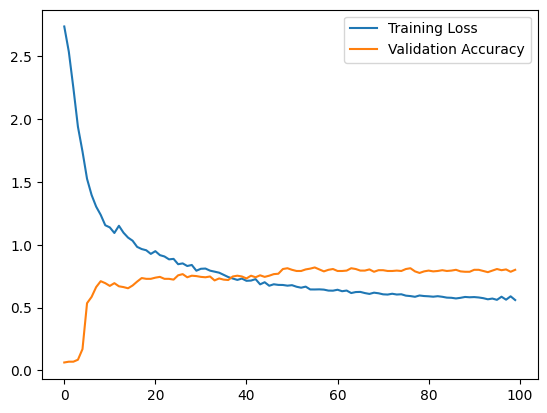

In [80]:
# plot the loss and accuracy
plt.plot(losses)
plt.plot(accuracies_val)
plt.legend(['Training Loss', 'Validation Accuracy'])
plt.show()

In [81]:
# evaluate the model on test set
model.eval()
pred = model(data).argmax(dim=1)
correct = compute_accuracy(pred[data.test_mask], data.y[data.test_mask])
acc = int(correct) / int(data.test_mask.sum())
print(f'Accuracy: {acc:.4f}')

Accuracy: 0.8616


We got **86%** accuracy on the test set


# Hyperparameter Tuning (with Optuna)

Fist to use optuna we need to create a "study", which is similair to a session

In [82]:
study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler())

[I 2023-10-16 19:42:09,647] A new study created in memory with name: no-name-dbd894e5-f350-4fe9-aada-141868e99329


Then we need to **tweak our model** a little bit, by adding the **params** dictionary (contains values of hyperparameters)

In [83]:
class build_model(torch.nn.Module):
    def __init__(self, params):
        super().__init__()


        self.conv1 = GCNConv(4, params['n_unit'])  # 4= number of features
        self.conv2 = GCNConv(params['n_unit'], 6)  # 6 = number of classes

    def forward(self, data):
        # x: Node feature matrix
        # edge_index: Graph connectivity matrix

        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)

        return F.log_softmax(x, dim=1)

In [84]:
def train_and_evaluate(param, model):

    criterion = nn.CrossEntropyLoss()
    optimizer = getattr(optim, param['optimizer'])(model.parameters(), lr= param['learning_rate'])


    for epoch_num in range(100):
        optimizer.zero_grad()
        out = model(data)


        loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])

        #training
        correct = compute_accuracy(out.argmax(dim=1)[data.train_mask], data.y[data.train_mask])
        acc = int(correct) / int(data.train_mask.sum())

        #validation
        correct_val = compute_accuracy(out.argmax(dim=1)[data.val_mask], data.y[data.val_mask])
        acc_val = int(correct_val) / int(data.val_mask.sum())

        losses.append(loss.item())
        accuracies.append(acc)

        loss.backward()
        optimizer.step()

    return acc_val #validation accuracy

Optuna requires an objective function, containg out **params** dictionary and the `build_model` and `train_and_evaluate` function

In [87]:
def objective(trial):

    params = {
              'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
              'optimizer': trial.suggest_categorical("optimizer", ["Adam", "RMSprop", "SGD"]),
              'n_unit': trial.suggest_int("n_unit", 16, 128)
              }

    model = build_model(params)

    accuracy = train_and_evaluate(params, model)

    return accuracy

 we call the optimize method

In [88]:
study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=20)

[I 2023-10-16 19:43:04,945] A new study created in memory with name: no-name-35dc17a0-ba26-4db1-ba53-fec4953377f0
<ipython-input-87-9856a7c3c9a6>:4: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2023-10-16 19:44:55,281] Trial 0 finished with value: 0.771875 and parameters: {'learning_rate': 0.0037417401711100206, 'optimizer': 'Adam', 'n_unit': 39}. Best is trial 0 with value: 0.771875.
[I 2023-10-16 19:46:58,590] Trial 1 finished with value: 0.73125 and parameters: {'learning_rate': 0.0006042468858280349, 'optimizer': 'RMSprop', 'n_unit': 34}. Best is trial 0 with value: 0.771875.
[I 2023-10-16 19:49:50,214] Trial 2 finished with value: 0.765625 and parameters: {'learning_rate': 0.0008826641986037587, 'optimizer': 'RMSprop', 'n_unit': 86}. Best is trial 0 with value: 0.771875.
[I 2023-10-16 19:52:55,175] Trial 3 finished wit

We can then extract the best model hyperameters:

In [89]:
best_trial = study.best_trial

for key, value in best_trial.params.items():
    print("{}: {}".format(key, value))

learning_rate: 0.014822870000209425
optimizer: Adam
n_unit: 75


### Now let's build the model, with the optimal hyperparameters and see the result on the test set

In [90]:
model = GCN(best_trial.params["n_unit"]) #

if best_trial.params["optimizer"] == "Adam":
    optimizer = torch.optim.Adam(model.parameters(), lr=best_trial.params["learning_rate"])
elif best_trial.params["optimizer"] == "Adamax":
    optimizer = torch.optim.Adamax(model.parameters(), lr=best_trial.params["learning_rate"])
else :
    optimizer = torch.optim.RMSprop(model.parameters(), lr=best_trial.params["learning_rate"])


In [91]:
# train the model
model.train()
losses = []
accuracies = []
losses_val = []
accuracies_val = []
for epoch in range(100):
    optimizer.zero_grad()
    out = model(data)

    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss_val = F.nll_loss(out[data.val_mask], data.y[data.val_mask])

    correct = compute_accuracy(out.argmax(dim=1)[data.train_mask], data.y[data.train_mask])
    acc = int(correct) / int(data.train_mask.sum())

    correct_val = compute_accuracy(out.argmax(dim=1)[data.val_mask], data.y[data.val_mask])
    acc_val = int(correct_val) / int(data.val_mask.sum())

    losses.append(loss.item())
    losses_val.append(loss_val.item())

    accuracies.append(acc)
    accuracies_val.append(acc_val)

    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print('Epoch: {}, Training Loss: {:.4f}, Training Acc: {:.4f},  Validation Loss: {:.4f}, Validation Acc: {:.4f}'.format(epoch+1, loss.item(), acc, loss_val.item(), acc_val))

Epoch: 10, Training Loss: 0.8352, Training Acc: 0.7226,  Validation Loss: 0.8252, Validation Acc: 0.7469
Epoch: 20, Training Loss: 0.7080, Training Acc: 0.7579,  Validation Loss: 0.7233, Validation Acc: 0.7656
Epoch: 30, Training Loss: 0.6156, Training Acc: 0.8293,  Validation Loss: 0.6486, Validation Acc: 0.8187
Epoch: 40, Training Loss: 0.5721, Training Acc: 0.8188,  Validation Loss: 0.6139, Validation Acc: 0.8063
Epoch: 50, Training Loss: 0.5303, Training Acc: 0.8364,  Validation Loss: 0.5649, Validation Acc: 0.8094
Epoch: 60, Training Loss: 0.5257, Training Acc: 0.8231,  Validation Loss: 0.5695, Validation Acc: 0.8156
Epoch: 70, Training Loss: 0.5235, Training Acc: 0.8172,  Validation Loss: 0.5715, Validation Acc: 0.8094
Epoch: 80, Training Loss: 0.4949, Training Acc: 0.8219,  Validation Loss: 0.5380, Validation Acc: 0.8094
Epoch: 90, Training Loss: 0.4964, Training Acc: 0.8278,  Validation Loss: 0.5332, Validation Acc: 0.8250
Epoch: 100, Training Loss: 0.4773, Training Acc: 0.8360

### Evaluating on the test set

In [92]:
# evaluate the model on test set
model.eval()
pred = model(data).argmax(dim=1)
correct = compute_accuracy(pred[data.test_mask], data.y[data.test_mask])
acc = int(correct) / int(data.test_mask.sum())
print(f'Accuracy: {acc:.4f}')

Accuracy: 0.8616


#### **Result**: we got **84%** on the test set using our set of optimal parameters

#### Not bad, especially giving that we only optimized 3 hyperparameters (due to hardware computational limits)

#### Classification - is_malicious IP_validated
```



**Semi-Supervised Learning** is a situation wherein the some of the samples in the data are not labeled. The Semi-supervised learning falls between unsupervised learning (with no labeled training data) and supervised learning (with only labeled training data).

The sklearn library has semi-supervised estimators that are able to make use of this unlabeled data to better capture the shape of underlying data distribution and generalize better to new samples. These algorithms can perform well when there are very small amount of labeled points and a large amount of unlabeled points.

sk-learn provides two label propagation models: `LabelPropagation` and `LabelSpreading`. Both work by constructing a similarity graph over all items in the input dataset.

for this task, we're going to use `LabelSpreading`.

In [93]:
columns = ["n_ips_reported_tran","nbr_watchers","avg_activity_in_days_tran","avg_age_in_days_tran"]
#whole dataset
df_semi=df[columns]
labels_semi= df['is_validated'].replace({True:1,False:0, np.nan:-1})

#only validated
df_semi_is_val=df_is_val[columns]
labels_semi_is_val = df_is_val['is_validated'].replace({True:1,False:0})

In [94]:
#only validated dataset
df_semi_is_val.shape, labels_semi_is_val.shape

((3187, 4), (3187,))

In [95]:
df_semi.shape, labels_semi.shape

((29173, 4), (29173,))

In [96]:
# Next we will **manually** induce some unlabeled samples into the validated_ips dataset
# Random Number Generator
rng = np.random.RandomState(0)

#Define How Many Samples Should be Unlabeled
random_unlabeled_points = rng.rand(len(labels_semi_is_val)) <= 0.5 #Almost 50% samples are unlabeled

#Seperate list for Unlabeled Samples
Unlabeled = np.copy(labels_semi_is_val)
Unlabeled[random_unlabeled_points] = -1

In [97]:
# Label Spreading
label_prop_model = LabelSpreading()


label_prop_model.fit(df_semi_is_val, Unlabeled)

LabelSpreading()

In [98]:
#Accuracy of Prediction
accuracy=label_prop_model.score(df_semi_is_val , labels_semi_is_val)

print("Label spreading Accuracy: ",'{:.2%}'.format(accuracy))

Label spreading Accuracy:  86.57%


/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning:

invalid value encountered in divide



Our Label Spreading model had an accuracy of spreading *86.57%*  on the validated_ips dataset, which seems good enough,  we will now use it on the whole dataset.

*This may take a while, depending on your hardware*


In [ ]:
label_prop_model.fit(df_semi, labels_semi)

Finally we can access the *new labels*, using the `transduction_` attribute

In [ ]:
new_labels = label_prop_model.transduction_

Finally, we can output these newly predicted labels directly and maintain our labelSpreading model. *Or* we can use these newly predicted labels to train another classifier (Decision tree, Random Forest, XGBoost ..etc).

*However*, it's worth noting that the performance metric (ex: accuracy) of the new classifier isn't a reliable estimate, since the newly predicted labels, DO NOT represent the ground truth, and whatever score we reach will not be representative

In [ ]:
####    Conclusion
- Using networkx and pytocrch geometric to create Graphs, and Graph neural networks
- Building node classifiers using pytocrch geometric
- Performing hyperparameter optimization with optuna framework
- Using semi-supervised approaches